In [495]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1)  Data set into python environment

In [496]:
data=pd.read_csv(r'C:\Users\jibin\Downloads\titanic_dataset.csv')

In [497]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [498]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [499]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [500]:
data.shape

(891, 12)

## 2)'PassengerId' as the index column

In [501]:
data1=pd.read_csv(r'C:\Users\jibin\Downloads\titanic_dataset.csv',index_col='PassengerId')

In [502]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3)Basic details

In [503]:
data1.shape

(891, 11)

In [504]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [505]:
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [506]:
type(data1)

pandas.core.frame.DataFrame

## 4)Fill in missing value

In [507]:
data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [508]:
num_cols=data1[['Survived', 'Pclass','Age', 'SibSp', 'Parch',  'Fare' ]]
num_cols.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [509]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [510]:
imputer=imputer.fit(num_cols)

In [511]:
num_cols=imputer.transform(num_cols)

In [512]:
type(num_cols)

numpy.ndarray

In [513]:
num_cols=pd.DataFrame(num_cols,columns=[['Survived', 'Pclass','Age', 'SibSp', 'Parch',  'Fare' ]])

In [514]:
num_cols.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [515]:
num_cols.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [516]:
data1.drop(['Survived', 'Pclass','Age', 'SibSp', 'Parch',  'Fare'],inplace=True,axis=1)

In [517]:
data1.head()

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S


In [518]:
      data1.drop(['Cabin'],inplace=True,axis=1)  
    # since the missing value is greater than 10%

In [519]:
data1.head()

,Name,Sex,Ticket,Embarked
PassengerId,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
5,"Allen, Mr. William Henry",male,373450,S


In [520]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [521]:
imputer=imputer.fit(data1)
data1=imputer.transform(data1)

In [522]:
type(data1)

numpy.ndarray

In [523]:
data1=pd.DataFrame(data1,columns=[['Name','Sex','Ticket','Embarked' ]])


In [524]:
data1.isna().sum()

Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

## 5)Check and handle outliers

In [525]:
data1=pd.concat([num_cols,data1],axis=1)


In [526]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,0.0,3.0,22.0,1.0,0.0,7.2500,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,1.0,1.0,38.0,1.0,0.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,1.0,3.0,26.0,0.0,0.0,7.9250,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,1.0,1.0,35.0,1.0,0.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,0.0,3.0,35.0,0.0,0.0,8.0500,"Allen, Mr. William Henry",male,373450,S


In [527]:
data1=pd.read_csv(r'C:\Users\jibin\Downloads\titanic_dataset.csv',index_col='PassengerId')


In [528]:
freqgraph=data1.select_dtypes(include=['float'])

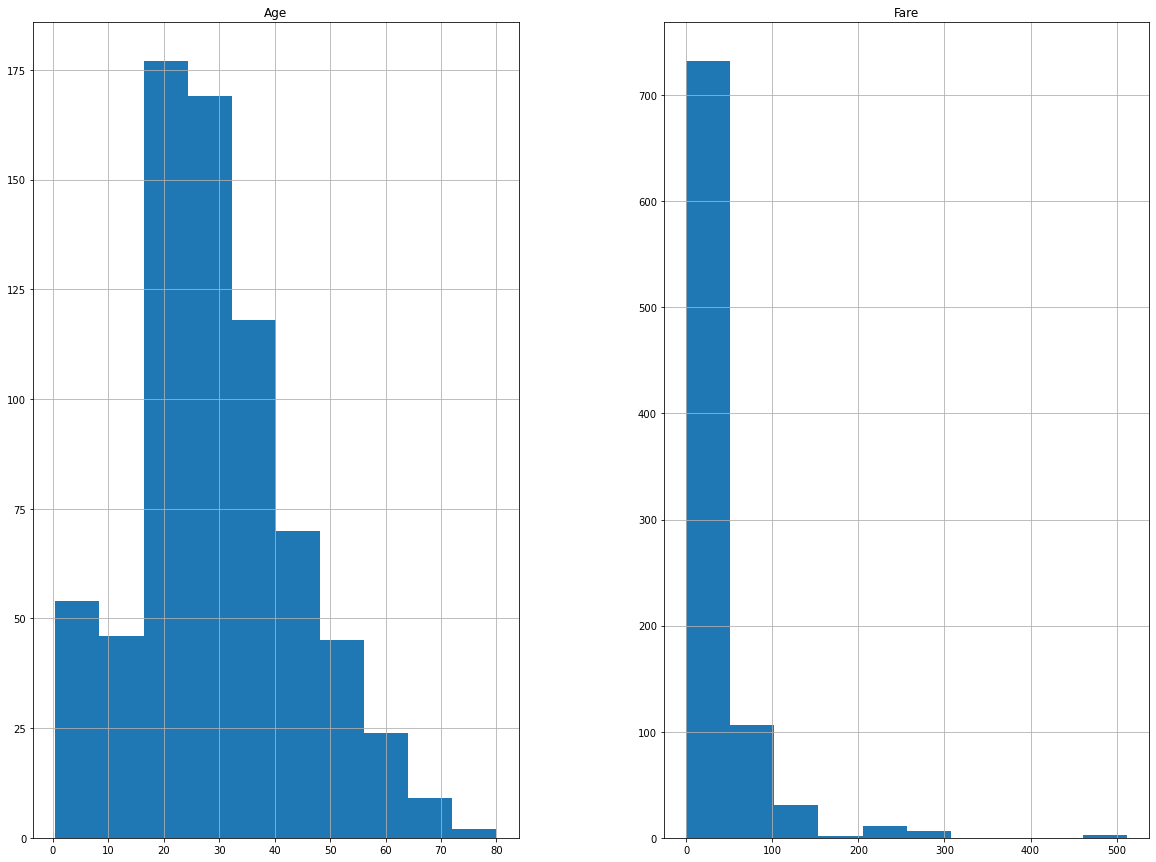

In [529]:
freqgraph.hist(figsize=(20,15))
plt.show()

In [530]:
freqgraph=data1.select_dtypes(include=['integer'])

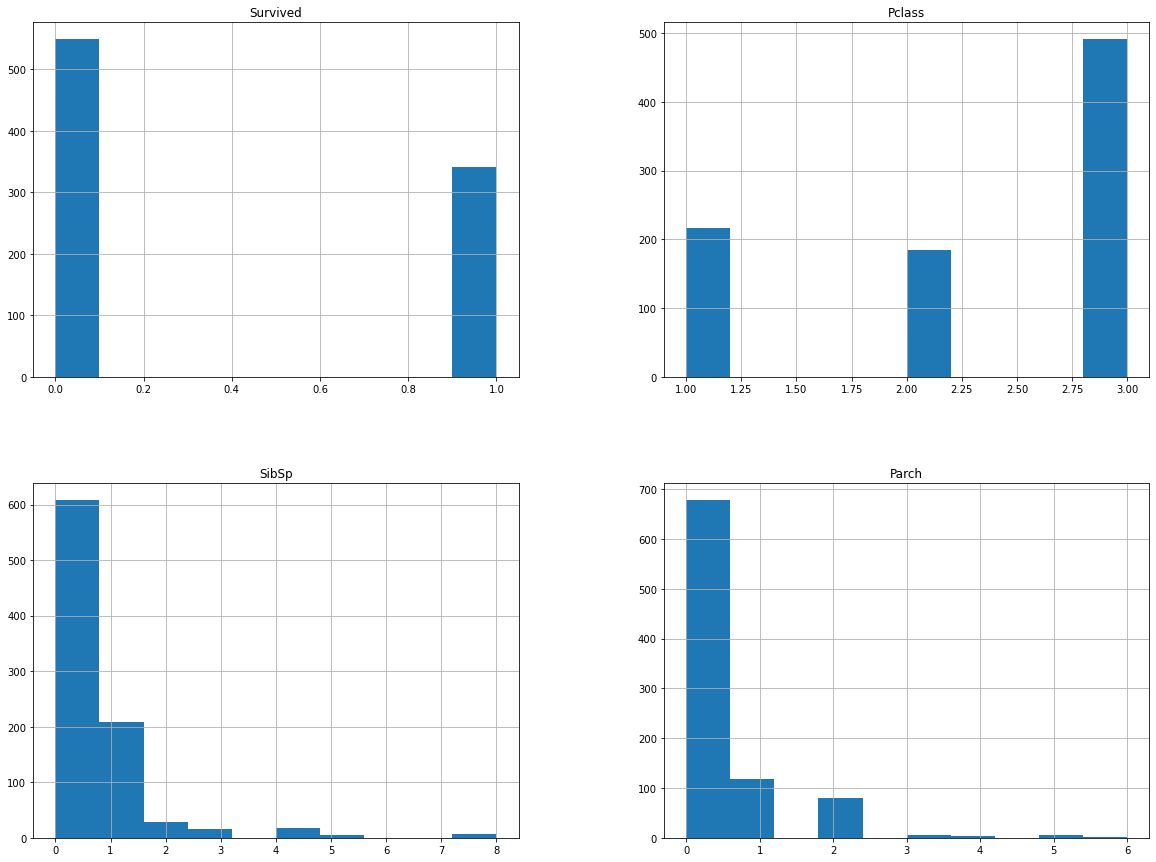

In [531]:
freqgraph.hist(figsize=(20,15))
plt.show()

In [532]:
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [533]:
for col in['Pclass','Age']:
    data1[col]=data1[col].fillna(data1[col].mean())

In [534]:
for col in['Fare','Survived','SibSp','Parch']:
    data1[col]=data1[col].fillna(data1[col].median())

In [535]:
data1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Text(0.5, 1.0, 'Age')

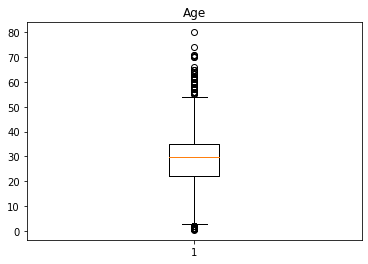

In [536]:
plt.boxplot(data1['Age'])
plt.title('Age')

In [537]:
Q1=np.percentile(data1['Age'],25,interpolation='midpoint')

In [538]:
Q2=np.percentile(data1['Age'],50,interpolation='midpoint')

In [539]:
Q3=np.percentile(data1['Age'],75,interpolation='midpoint')

In [540]:
print(Q1)
print(Q2)
print(Q3)

22.0
29.69911764705882
35.0


In [541]:
data1['Age'].median()

29.69911764705882

In [542]:
IQR=Q3-Q1

In [543]:
print(IQR)

13.0


In [544]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.5
54.5


In [545]:
outlier=[]
for i in data['Age']:
    if(i>up_lim) or (i<low_lim):
        outlier.append(i)

In [546]:
ind=data1['Age']>up_lim
data1.loc[ind].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

Text(0.5, 1.0, 'Fare')

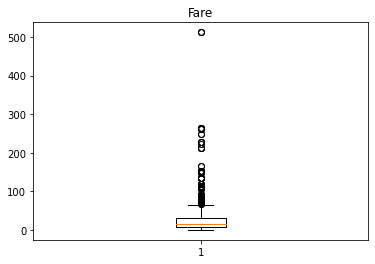

In [547]:
plt.boxplot(data1['Fare'])
plt.title('Fare')

In [548]:
Q1=np.percentile(data1['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data1['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data1['Fare'],75,interpolation='midpoint')

In [549]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [550]:
data1['Fare'].median()

14.4542

In [551]:
IQR=Q3-Q1

In [552]:
print(IQR)

23.0896


In [553]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-26.724
65.6344


In [554]:
outlier=[]
for i in data['Fare']:
    if(i>up_lim) or (i<low_lim):
        outlier.append(i)

In [555]:
ind=data1['Fare']>up_lim
data1.loc[ind].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

Text(0.5, 1.0, 'SibSp')

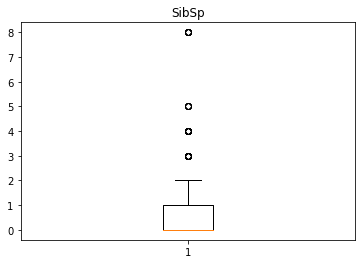

In [556]:
plt.boxplot(data1['SibSp'])
plt.title('SibSp')

In [557]:
Q1=np.percentile(data1['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data1['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data1['SibSp'],75,interpolation='midpoint')

In [558]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [559]:
data1['SibSp'].median()

0.0

In [560]:
IQR=Q3-Q1

In [561]:
print(IQR)

1.0


In [562]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-1.5
2.5


In [563]:
outlier=[]
for i in data['SibSp']:
    if(i>up_lim) or (i<low_lim):
        outlier.append(i)

In [564]:

ind=data1['SibSp']>up_lim
data1.loc[ind].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

## 6)min max scaling 

In [577]:
data1=pd.read_csv(r'C:\Users\jibin\Downloads\titanic_dataset.csv',index_col='PassengerId')

In [580]:
type(data1)

pandas.core.frame.DataFrame

In [581]:
data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [582]:
num_cols=data1[['Survived', 'Pclass','Age', 'SibSp', 'Parch',  'Fare' ]]
num_cols.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [583]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [585]:
imputer=imputer.fit(num_cols)

In [586]:
num_cols=imputer.transform(num_cols)

In [587]:
num_cols=pd.DataFrame(num_cols,columns=[['Survived', 'Pclass','Age', 'SibSp', 'Parch',  'Fare' ]])

In [588]:
num_cols.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [589]:
data2=num_cols

In [592]:
data2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [593]:
from sklearn import preprocessing

In [599]:
from sklearn.model_selection import train_test_split

In [600]:
x= data2.drop('Survived', axis=1)
y=data2['Survived']


C:\Users\jibin\AppData\Local\Temp\ipykernel_880\3939776942.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x= data2.drop('Survived', axis=1)


In [602]:
from sklearn.linear_model import LinearRegression

In [603]:
lin_reg=LinearRegression()

In [604]:
model=lin_reg.fit(x_train, y_train)

predictions=model.predict(x_test)

C:\Users\jibin\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jibin\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [605]:
lin_reg=LinearRegression()
model=lin_reg.fit(x_train, y_train)
predictions=model.predict(x_test)

C:\Users\jibin\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jibin\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [606]:
from sklearn.metrics import mean_squared_error,r2_score

The mean squared error value is: 0.18715395657928013
The r squared value is: 0.228236818178029


In [609]:
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max_scaler.fit_transform(x)


C:\Users\jibin\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jibin\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [610]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=42,test_size=0.2)

In [611]:
lin_reg=LinearRegression()
model=lin_reg.fit(x_train, y_train)
predictions=model.predict(x_test)

In [612]:
print('The mean squared error value is:', mean_squared_error(y_test, predictions))
print('The r squared value is:', r2_score(y_test, predictions))

The mean squared error value is: 0.1871539565792801
The r squared value is: 0.2282368181780291
